หลังจากที่ทดแล้ว Learning Machine ตัวที่ดีที่สุดคือ SVM เราก็จะมาทดสอบกับข้อมูลจริง

In [ ]:
# make predictions
from pandas import read_csv
# Load dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset = read_csv(url, names=names)

แยกข้อมูลเป็น train และ test โดย test_size = 20% (ซึ่งก็คือมี train size = 80%)

In [ ]:
from sklearn.model_selection import train_test_split
# Split-out validation dataset
array = dataset.values
X = array[:,0:4] # 4 คอลัมน์แรกของข้อมูล นับจากคอลัมน์ที่ 0 (ใน array คอลัมน์แรกมีตัวชี้เป็น เลข 0)
y = array[:,4] # คอลัมน์ที่ 5 (class) (ซึ่งอ้างคอลัมน์ที่ 5 โดย ตัวชี้เป็นเลข 4)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)


ขนาดของ X_train และ  y_train

In [ ]:
print(X_train.shape)
print(y_train.shape)

(120, 4)
(120,)


ขนาดของ X_test และ y_test

In [ ]:
print(X_test.shape)
print(y_test.shape)

(30, 4)
(30,)


สอน SVM ให้มีความรู้

In [ ]:
# Make predictions on validation dataset
from sklearn.svm import SVC
model = SVC(gamma='auto')
model.fit(X, y)


SVC(gamma='auto')

ทดสอบการพยากรณ์

In [ ]:
predictions = model.predict(X)

print(predictions)

['Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor

ผลการพยากรณ์ แสดงในรูปของ accuracy และ confusion matrix

In [ ]:
# Evaluate predictions


from sklearn.metrics import accuracy_score
print(accuracy_score(y, predictions))


0.9866666666666667


<Axes: >

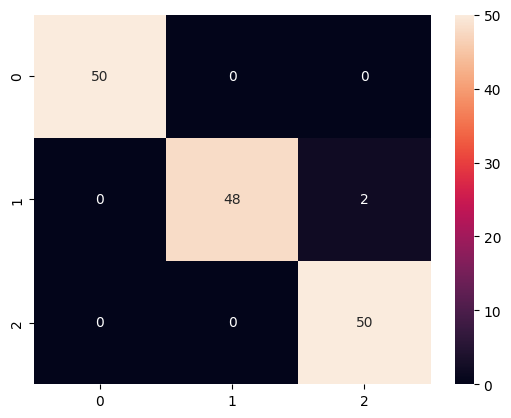

In [ ]:
from sklearn.metrics import confusion_matrix
cfm=confusion_matrix(y, predictions)
print(cfm)
import seaborn
seaborn.heatmap(cfm, annot=True)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y, predictions))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        50
Iris-versicolor       1.00      0.96      0.98        50
 Iris-virginica       0.96      1.00      0.98        50

       accuracy                           0.99       150
      macro avg       0.99      0.99      0.99       150
   weighted avg       0.99      0.99      0.99       150

